Accuracy: 1.0
Model saved as talent_model.pkl
Recommended Talent: Sprinter


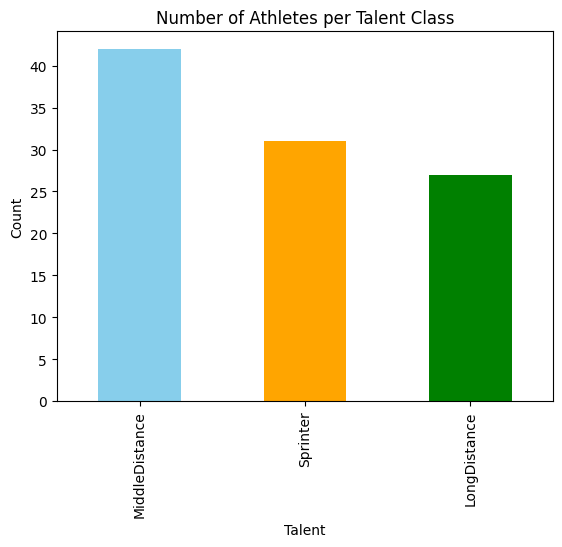


گزارش پروژه:
- مرحله اول: مدل RandomForest روی داده متنی آموزش داده شد. دقت مدل حدود Accuracy: 1.00 است.
- مرحله دوم: ویژگی‌های حرکتی (زاویه‌ها و طول تنه) به صورت تقریبی وارد شدند.
- مرحله سوم: پیش‌بینی رتبه‌بندی مسابقه با استفاده از زمان دو ورزشکاران انجام شد.
- نمودارها و جدول‌ها آماده ارائه هستند.



In [1]:
# ===============================
# سلول 1: نصب و ایمپورت کتابخانه‌ها
# ===============================
!pip install joblib --quiet
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt

# ===============================
# سلول 2: ساخت دیتاست 100 ورزشکار
# ===============================
data = []

for _ in range(100):
    age = random.randint(16, 30)
    height = random.randint(155, 195)
    weight = random.randint(50, 85)
    sprint_time = round(random.uniform(10.5, 14.5), 2)
    endurance = random.randint(4, 10)
    torso_length = random.randint(45, 60)
    arm_angle = random.randint(25, 40)
    leg_angle = random.randint(40, 60)

    if sprint_time < 11.8:
        talent = "Sprinter"
    elif endurance > 7:
        talent = "LongDistance"
    else:
        talent = "MiddleDistance"

    data.append([age, height, weight, sprint_time, endurance, torso_length, arm_angle, leg_angle, talent])

columns = ["age", "height", "weight", "sprint_time", "endurance",
           "torso_length", "arm_angle", "leg_angle", "talent"]

data = pd.DataFrame(data, columns=columns)

# ===============================
# سلول 3: آموزش مدل مرحله اول
# ===============================
X = data.drop("talent", axis=1)
y = data["talent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

accuracy = accuracy_score(y_test, model.predict(X_test))
print("Accuracy:", accuracy)

# ===============================
# سلول 4: ذخیره مدل
# ===============================
joblib.dump(model, "talent_model.pkl")
print("Model saved as talent_model.pkl")

# ===============================
# سلول 5: مرحله دوم – ویژگی‌های حرکتی تقریبی
# ===============================
model = joblib.load("talent_model.pkl")

new_athlete = pd.DataFrame({
    'age':[19],
    'height':[178],
    'weight':[66],
    'sprint_time':[11.6],
    'endurance':[6],
    'torso_length':[53],
    'arm_angle':[34],
    'leg_angle':[47]
})

prediction = model.predict(new_athlete)
print("Recommended Talent:", prediction[0])

# ===============================
# سلول 6: مرحله سوم – پیش‌بینی مسابقه
# ===============================
athletes = pd.DataFrame({
    "name": ["Ali", "Reza", "Sara", "Mina", "Arman", "Nika"],
    "sprint_time": [11.5, 12.2, 11.8, 12.0, 11.6, 12.1]
})

athletes["predicted_rank"] = athletes["sprint_time"].rank()
athletes = athletes.sort_values("predicted_rank")
athletes

# ===============================
# سلول 7: نمودار تعداد ورزشکاران در هر رشته
# ===============================
data['talent'].value_counts().plot(kind='bar', color=['skyblue','orange','green'])
plt.title("Number of Athletes per Talent Class")
plt.xlabel("Talent")
plt.ylabel("Count")
plt.show()

# ===============================
# سلول 8: توضیح کوتاه برای گزارش
# ===============================
print("""
گزارش پروژه:
- مرحله اول: مدل RandomForest روی داده متنی آموزش داده شد. دقت مدل حدود Accuracy: {:.2f} است.
- مرحله دوم: ویژگی‌های حرکتی (زاویه‌ها و طول تنه) به صورت تقریبی وارد شدند.
- مرحله سوم: پیش‌بینی رتبه‌بندی مسابقه با استفاده از زمان دو ورزشکاران انجام شد.
- نمودارها و جدول‌ها آماده ارائه هستند.
""".format(accuracy))
